In [4]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import requests, citipy, api key & datetime
import requests
from citipy import citipy
from config import Weather_api_key
from datetime import datetime

In [5]:
# Create random 1500 longitudes & 1500 latitudes & zip them 
lats = np.random.uniform(low = -90.00, high = 90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [6]:
# Create a coordinates list to carry the zipped coordinates
coordinates = list(lat_lngs)

In [7]:
# Create an empty list to hold the cities
cities = []
# Find the nearest city for each lat-long combination, then add each unique city name to the list, 
#then check the length of the list 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

625

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + Weather_api_key

In [9]:

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | pangody
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | allende
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | rincon
Processing Record 7 of Set 1 | yomitan
City not found. Skipping...
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | ogaminana
Processing Record 10 of Set 1 | kirensk
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | kroya
Processing Record 14 of Set 1 | karamay
City not found. Skipping...
Processing Record 15 of Set 1 | cowra
Processing Record 16 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 17 of Set 1 | canatlan
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | lagunas
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | rikitea
Processing 

Processing Record 36 of Set 4 | belmonte
Processing Record 37 of Set 4 | mindelo
Processing Record 38 of Set 4 | nikolskoye
Processing Record 39 of Set 4 | shaowu
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | kant
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | vestmanna
Processing Record 44 of Set 4 | jiaocheng
Processing Record 45 of Set 4 | lima
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | rapar
Processing Record 49 of Set 4 | gloversville
Processing Record 50 of Set 4 | acajutla
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | porto velho
Processing Record 3 of Set 5 | eyl
Processing Record 4 of Set 5 | laurel
Processing Record 5 of Set 5 | vila franca do campo
Processing Record 6 of Set 5 | neryungri
Processing Record 7 of Set 5 | wulanhaote
City not found. Skipping...
Processing Record 8 of Set 5 | kautokeino
Processing Record 9 of Set 5 | 

Processing Record 23 of Set 8 | refojos de basto
Processing Record 24 of Set 8 | cockburn town
Processing Record 25 of Set 8 | antofagasta
Processing Record 26 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 27 of Set 8 | basavakalyan
Processing Record 28 of Set 8 | namtsy
Processing Record 29 of Set 8 | smithers
Processing Record 30 of Set 8 | kashi
Processing Record 31 of Set 8 | moose factory
Processing Record 32 of Set 8 | achisay
City not found. Skipping...
Processing Record 33 of Set 8 | matara
Processing Record 34 of Set 8 | cubuk
Processing Record 35 of Set 8 | biltine
Processing Record 36 of Set 8 | corn island
Processing Record 37 of Set 8 | homer
Processing Record 38 of Set 8 | sao domingos
Processing Record 39 of Set 8 | leningradskiy
Processing Record 40 of Set 8 | mamakan
Processing Record 41 of Set 8 | guarapari
Processing Record 42 of Set 8 | ortigueira
Processing Record 43 of Set 8 | omsukchan
Processing Record 44 of Set 8 | lata
Processing Record 

Processing Record 5 of Set 12 | benjamin aceval
Processing Record 6 of Set 12 | narsaq
Processing Record 7 of Set 12 | imbituba
Processing Record 8 of Set 12 | egvekinot
Processing Record 9 of Set 12 | hukuntsi
Processing Record 10 of Set 12 | cayenne
Processing Record 11 of Set 12 | ola
Processing Record 12 of Set 12 | tapaua
City not found. Skipping...
Processing Record 13 of Set 12 | port augusta
Processing Record 14 of Set 12 | porto murtinho
Processing Record 15 of Set 12 | nenton
Processing Record 16 of Set 12 | pinerolo
Processing Record 17 of Set 12 | powell
Processing Record 18 of Set 12 | suzun
Processing Record 19 of Set 12 | yangambi
Processing Record 20 of Set 12 | florianopolis
Processing Record 21 of Set 12 | half moon bay
Processing Record 22 of Set 12 | kulhudhuffushi
Processing Record 23 of Set 12 | ulladulla
Processing Record 24 of Set 12 | vasai
Processing Record 25 of Set 12 | casablanca
Processing Record 26 of Set 12 | sistranda
Processing Record 27 of Set 12 | sa

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.1989,-35.4608,77.00,88,0,6.91,BR,2021-04-05 04:56:16
1,Pangody,65.8500,74.4859,32.83,100,100,9.55,RU,2021-04-05 04:56:16
2,Vaini,-21.2000,-175.2000,78.80,78,40,6.91,TO,2021-04-05 04:56:17
3,Allende,25.2833,-100.0167,69.80,64,75,11.50,MX,2021-04-05 04:56:17
4,Bredasdorp,-34.5322,20.0403,62.60,100,100,8.05,ZA,2021-04-05 04:56:18
5,Rincon,32.2960,-81.2354,53.60,58,1,4.99,US,2021-04-05 04:56:18
6,Tuktoyaktuk,69.4541,-133.0374,12.20,92,75,9.22,CA,2021-04-05 04:56:19
7,Ogaminana,7.5946,6.2248,75.76,90,5,6.85,NG,2021-04-05 04:54:21
8,Kirensk,57.7853,108.1119,22.35,61,15,3.36,RU,2021-04-05 04:56:19
9,Namibe,-15.1961,12.1522,79.25,79,45,6.60,AO,2021-04-05 04:56:20


In [12]:
new_order_columns = [ "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Touros,BR,2021-04-05 04:56:16,-5.1989,-35.4608,77.00,88,0,6.91
1,Pangody,RU,2021-04-05 04:56:16,65.8500,74.4859,32.83,100,100,9.55
2,Vaini,TO,2021-04-05 04:56:17,-21.2000,-175.2000,78.80,78,40,6.91
3,Allende,MX,2021-04-05 04:56:17,25.2833,-100.0167,69.80,64,75,11.50
4,Bredasdorp,ZA,2021-04-05 04:56:18,-34.5322,20.0403,62.60,100,100,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
import time

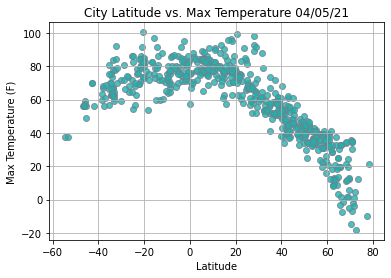

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, color="lightseagreen",
            edgecolor="slategray", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

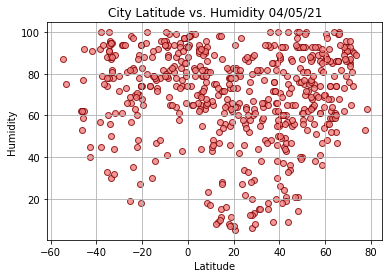

In [17]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity, color="lightcoral",
            edgecolor="maroon", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

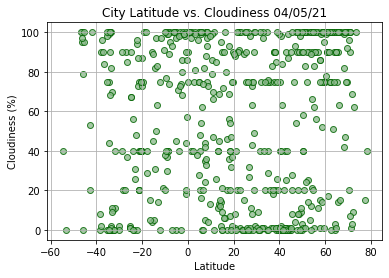

In [18]:
# Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness, color="darkseagreen",
            edgecolor="darkgreen", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

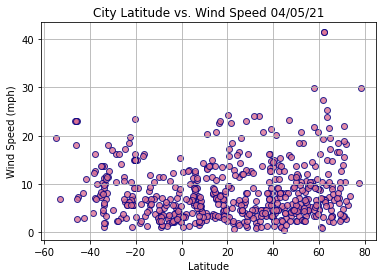

In [19]:
# Build the scatter plot for latitude vs. Wind speed
plt.scatter(lats,
            wind_speed, color="palevioletred",
            edgecolor="navy", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

In [23]:
# create two dataframes for the northern & southern hemispheres

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<= 0)]


In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

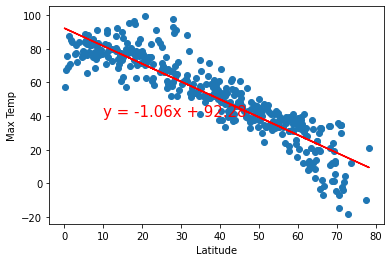

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

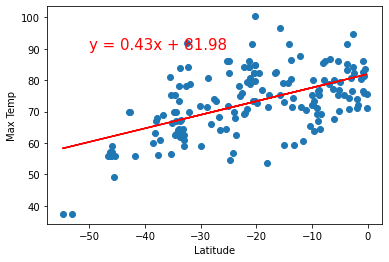

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
plt.show()

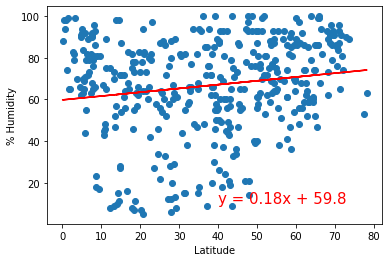

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

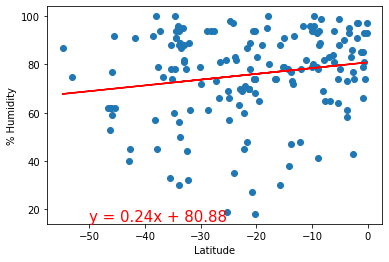

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

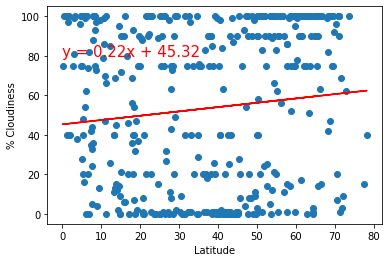

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

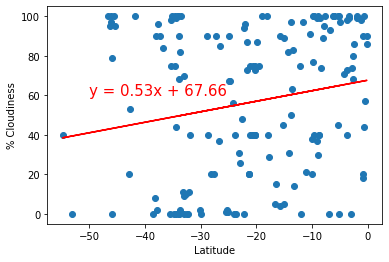

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

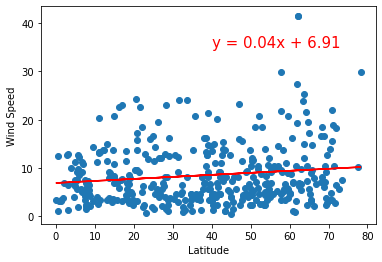

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

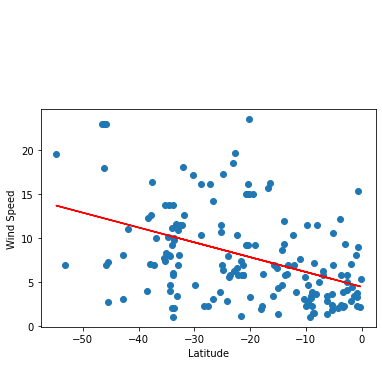

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))